In [3]:
#!pip install pandas 
#!pip install matplotlib
#!pip install plotly
#!pip install seaborn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
import plotly.express as px
import seaborn as sns

In [13]:
df = pd.read_csv('fcc-forum-pageviews.csv', parse_dates = ["date"], index_col = 'date')
df

value
date              
2016-05-09    1201
2016-05-10    2329
2016-05-11    1716
2016-05-12   10539
2016-05-13    6933
...            ...
2019-11-29  171584
2019-11-30  141161
2019-12-01  142918
2019-12-02  220144
2019-12-03  158549

[1304 rows x 1 columns]

In [7]:
lower_bound = df['value'].quantile(0.025)
upper_bound = df['value'].quantile(0.975)

In [19]:
filtered = df[(df['value'] > lower_bound) & (df['value'] < upper_bound)]
df['value']

date
2016-05-09      1201
2016-05-10      2329
2016-05-11      1716
2016-05-12     10539
2016-05-13      6933
               ...  
2019-11-29    171584
2019-11-30    141161
2019-12-01    142918
2019-12-02    220144
2019-12-03    158549
Name: value, Length: 1304, dtype: int64

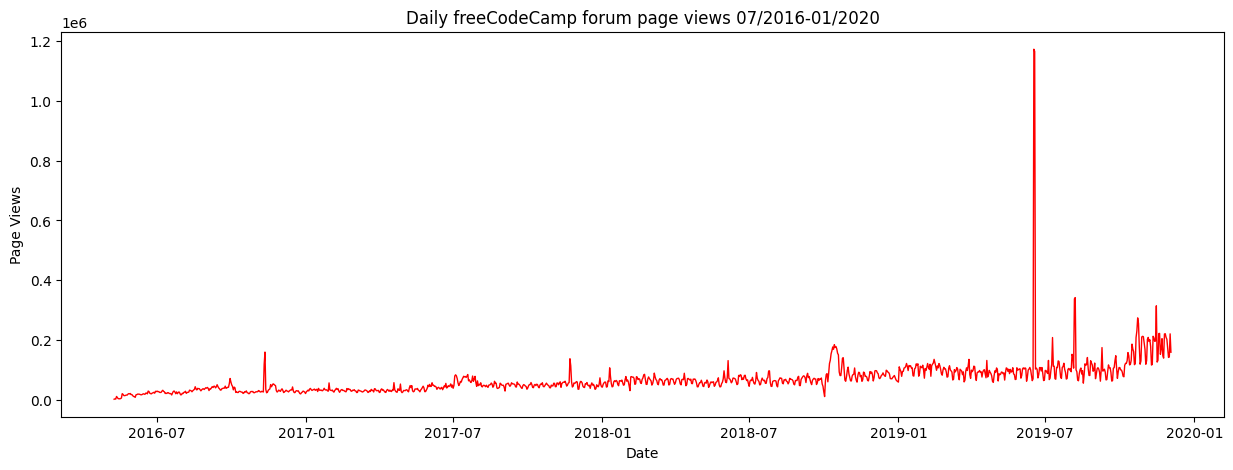

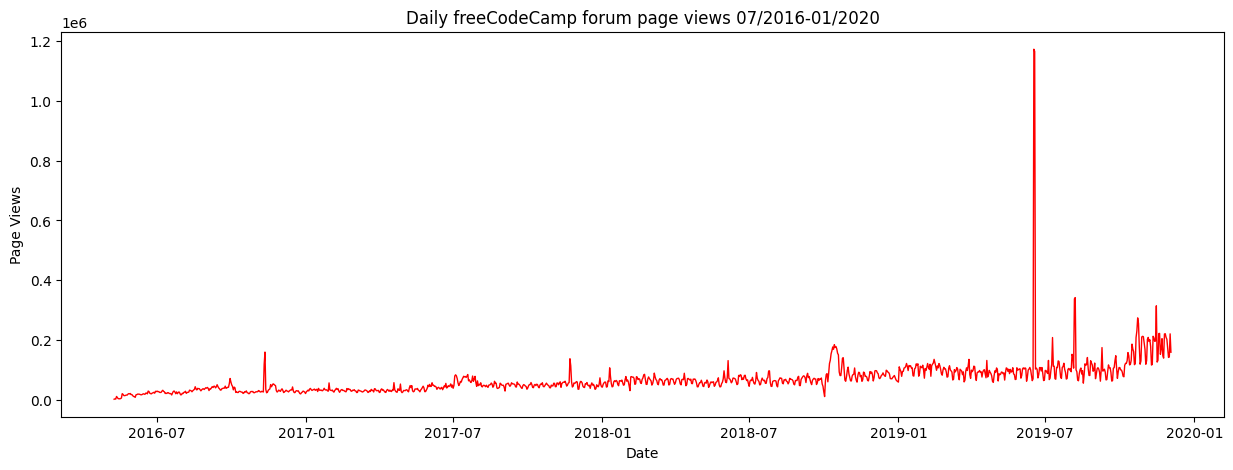

In [15]:
def draw_line_plot():

    fig, ax = plt.subplots(figsize=(15, 5)) 

    ax.plot(df.index, df['value'], 'r', linewidth = 1)
    
    ax.set_title("Daily freeCodeCamp forum page views 07/2016-01/2020")
    ax.set_xlabel('Date')
    ax.set_ylabel('Page Views')
    
    # Save the plot before showing it
    fig.savefig('line_plot.png')
    
    # Return the figure object
    return fig

draw_line_plot()

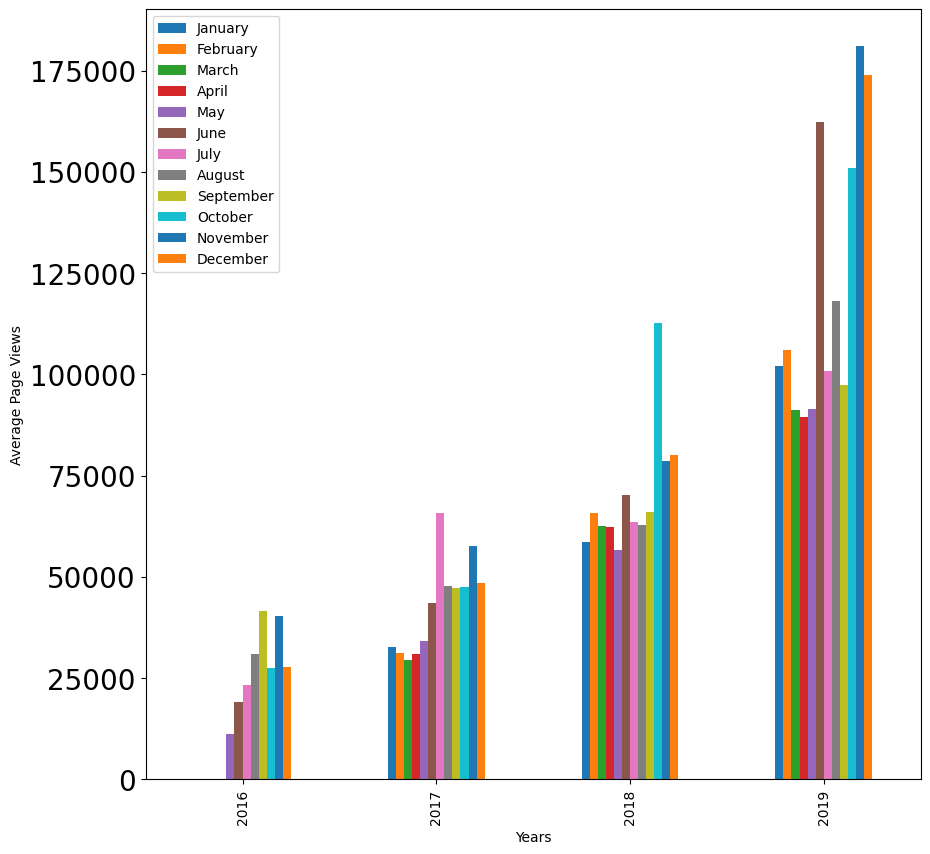

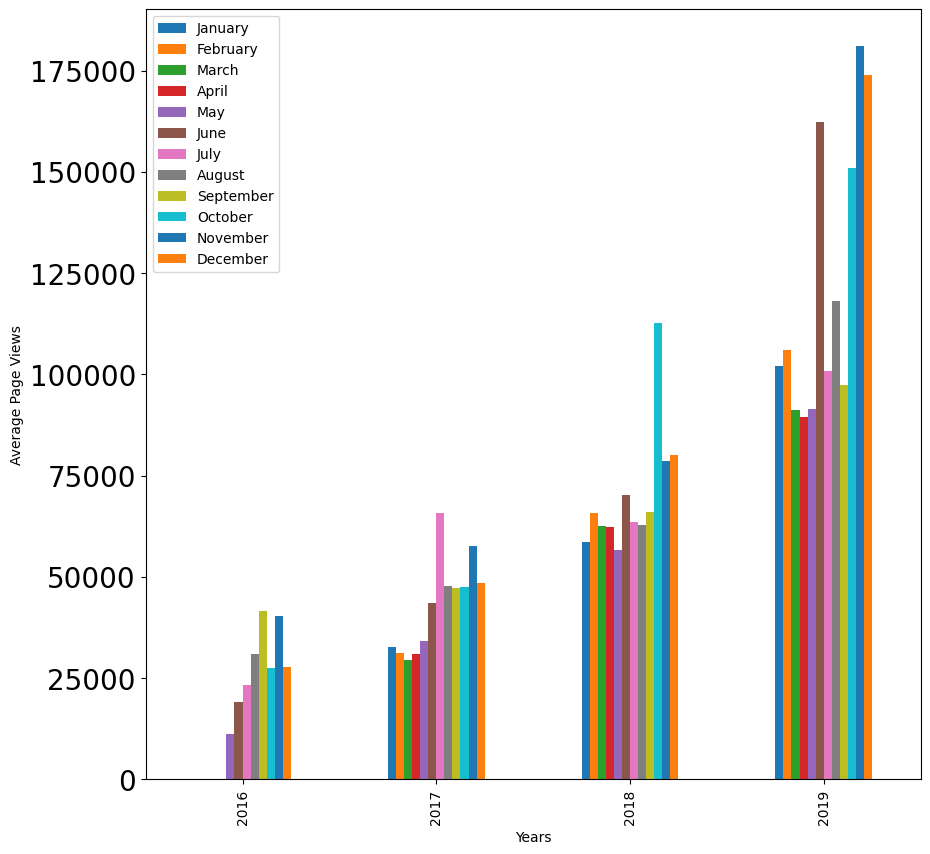

In [13]:
def draw_bar_plot():

    df['month'] = df.index.month
    df['year'] = df.index.year
    df_bar = df.groupby(['year', 'month'])['value'].mean()
    df_bar = df_bar.unstack()


    fig = df_bar.plot.bar(legend = True, figsize=(10,10), ylabel = "Average Page Views", xlabel="Years").figure
    plt.legend(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

    plt.xticks(fontsize = 10)
    plt.yticks(fontsize = 20)

    fig.savefig('bar_plot.png')    
    return fig

draw_bar_plot()

In [38]:
df['year'] = df.index.year
df['month'] = df.index.month
df_bar = df.groupby(['year', 'month'])['value'].mean()
df_bar
sns.boxplot(data=df, x''="year", y="value")
sns.boxplot(data=df, x="month", y="value")

year  month
2016  5         11242.695652
      6         19124.366667
      7         23314.225806
      8         31049.193548
      9         41476.866667
      10        27398.322581
      11        40448.633333
      12        27832.419355
2017  1         32785.161290
      2         31113.071429
      3         29369.096774
      4         30878.733333
      5         34244.290323
      6         43577.500000
      7         65806.838710
      8         47712.451613
      9         47376.800000
      10        47438.709677
      11        57701.566667
      12        48420.580645
2018  1         58580.096774
      2         65679.000000
      3         62693.774194
      4         62350.833333
      5         56562.870968
      6         70117.000000
      7         63591.064516
      8         62831.612903
      9         65941.733333
      10       112592.000000
      11        78688.333333
      12        80047.483871
2019  1        102056.516129
      2        105968.357143
  

In [40]:
def draw_box_plot():
    # Prepare data for box plots (this part is done!)
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]

    # Draw box plots (using Seaborn)

    fig, axes = plt.subplots(nrows = 1, ncols = 2, figzie(10,5))
    axes 



    # Save image and return fig (don't change this part)
    fig.savefig('box_plot.png')
    return fig


date   value  year month
0    2016-05-09    1201  2016   May
1    2016-05-10    2329  2016   May
2    2016-05-11    1716  2016   May
3    2016-05-12   10539  2016   May
4    2016-05-13    6933  2016   May
...         ...     ...   ...   ...
1299 2019-11-29  171584  2019   Nov
1300 2019-11-30  141161  2019   Nov
1301 2019-12-01  142918  2019   Dec
1302 2019-12-02  220144  2019   Dec
1303 2019-12-03  158549  2019   Dec

[1304 rows x 4 columns]